# Установка пакетов

In [ ]:
# !pip install catboost
# !pip install ydata-profiling

# Предварительный анализ

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import coint
# from ydata_profiling import ProfileReport

In [ ]:
from google.colab import drive
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt


drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
DIR_HOME = Path('/content/drive/MyDrive/hack/hack20231014')
NEW_HOME = Path('/content')

import shutil

n_list= ['pars_smp_train.npy', 'y_smp_train.npy', 'y_smp_test.npy']

for nfile in n_list:
    f_file = NEW_HOME/ nfile
    if f_file.is_file():
        continue
    shutil.copyfile(DIR_HOME/nfile, NEW_HOME/ nfile)

pars_smp   = np.load(NEW_HOME/ n_list[0])
y_smp      = np.load(NEW_HOME/ n_list[1])
y_smp_test = np.load(NEW_HOME/ n_list[2])



In [ ]:
y_smp_test = np.load(NEW_HOME/ n_list[1])

In [ ]:
X_test = y_smp[2000:3000]
pars_smp = pars_smp[:1000]
y_smp = y_smp[:1000]


In [ ]:
y_smp.shape

(1000, 200, 3)

In [ ]:
pars_smp.shape,y_smp.shape,  y_smp_test.shape,  X_test.shape

((1000, 15, 1), (1000, 200, 3), (100000, 200, 3), (0, 200, 3))

# Вероятности

In [ ]:
mean_0 = np.mean(pars_smp, axis=0)
std_0 = np.std(pars_smp, axis=0)
min_0 = np.min(pars_smp, axis=0)
maх_0 = np.max(pars_smp, axis=0)

# Округлите значения до двух знаков после запятой
mean_0 = np.round(mean_0, 2)
std_0 = np.round(std_0, 2)
min_0 = np.round(min_0, 2)
maх_0 = np.round(maх_0, 2)

# Создайте DataFrame
data = {'mean': mean_0.flatten(), 'std': std_0.flatten(), 'min': min_0.flatten(), 'maх': maх_0.flatten() }
df = pd.DataFrame(data)
# df['+1std'] = df['mean'] - df['mean']*df['std']*1
df['-3std'] = df['mean'] - df['mean']*df['std']*3
df['+3std'] = df['mean'] + df['mean']*df['std']*3

# Выведите DataFrame
print(df)

    mean   std   min   maх   -3std   +3std
0   1.49  0.37  0.13  2.71 -0.1639  3.1439
1   1.98  0.75  0.37  5.13 -2.4750  6.4350
2   0.50  0.15  0.10  0.94  0.2750  0.7250
3   0.51  0.10  0.19  0.81  0.3570  0.6630
4   1.53  0.25  1.00  2.32  0.3825  2.6775
5   0.12  0.05  0.00  0.29  0.1020  0.1380
6   0.99  0.39  0.16  2.62 -0.1683  2.1483
7   2.46  0.39  1.45  3.76 -0.4182  5.3382
8   0.40  0.10  0.09  0.77  0.2800  0.5200
9   0.50  0.20  0.04  0.97  0.2000  0.8000
10  0.50  0.19  0.05  0.96  0.2150  0.7850
11  0.02  0.57 -1.00  1.00 -0.0142  0.0542
12  0.09  0.05  0.03  0.52  0.0765  0.1035
13  0.09  0.04  0.03  0.45  0.0792  0.1008
14  0.09  0.05  0.03  0.64  0.0765  0.1035


# Графики

1.953354181060104
0.9999984794516131
4.599711979064769
0.8846415477390948
3.934545843047545


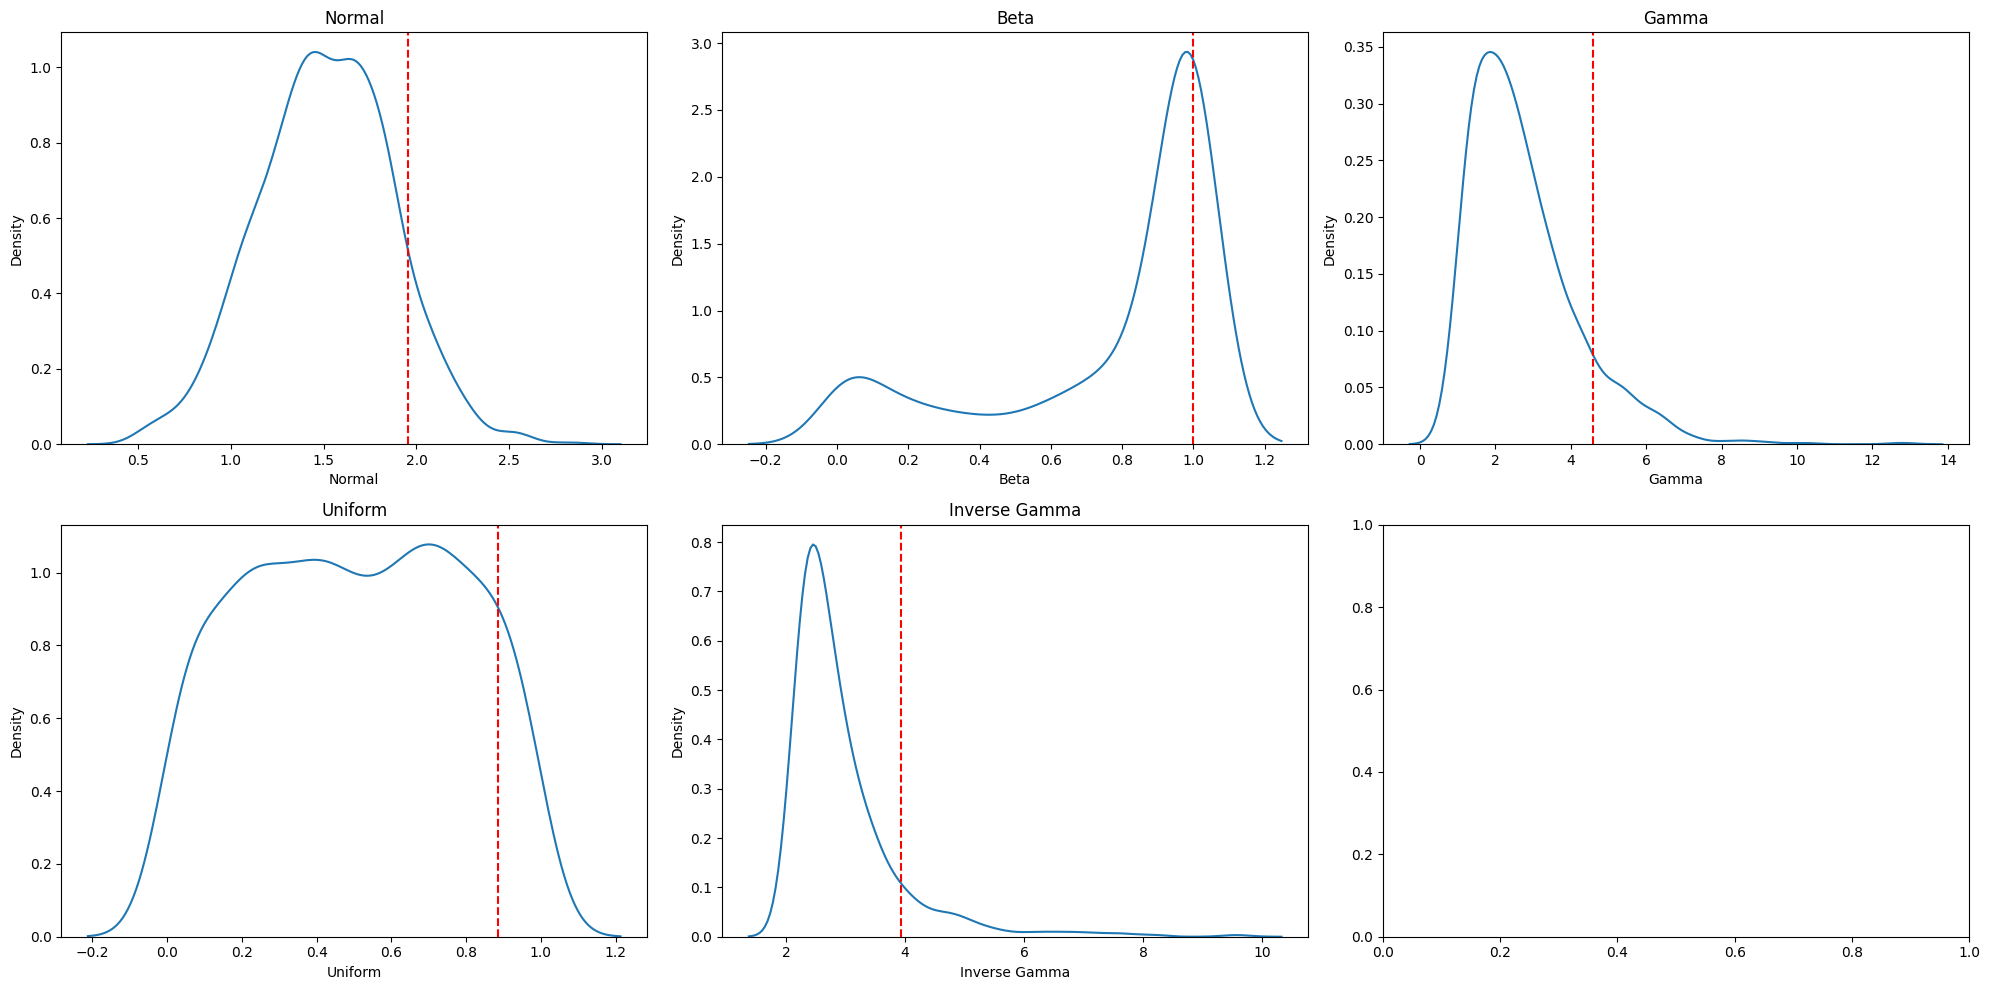

In [ ]:
import numpy as np
from scipy.stats import beta, gamma, invgauss
import pandas as pd

# Генерация образцов
n = 1000

normal = np.random.normal(1.5, 0.36, n)
beta = beta.rvs(0.5, 0.15, size=n)
gamma = gamma.rvs(2, 0.75, size=n)
uniform = np.random.uniform(0, 1, n)
inv_gamma = invgauss.rvs(1, 2, size=n)

# Создание DataFrame
df = pd.DataFrame({
    'Normal': normal,
    'Beta': beta,
    'Gamma': gamma,
    'Uniform': uniform,
    'Inverse Gamma': inv_gamma
})

import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(20,10))

for i, col in enumerate(df.columns):

    ax = axes.flat[i]
    sns.kdeplot(df[col], ax=ax)

    q90 = df[col].quantile(0.9)
    print(q90)
    ax.axvline(q90, color='r', linestyle='--')

    ax.set_title(col)

fig.tight_layout()
plt.show()

In [ ]:
import numpy as np
from scipy.stats import norm, beta, gamma, uniform, invgamma

# Задаем параметры распределения
tau_mu = 1.5
tau_sigma = 0.36

nu_shape = 2
nu_scale = 0.75

iota_alpha = 0.5
iota_beta = 0.15

zeta_alpha = 0.5
zeta_beta = 0.1

psi1_mu = 1.5
psi1_sigma = 0.25

psi2_mu = 0.12
psi2_sigma = 0.05

beta_mu = 1
beta_sigma = 0.4

pi_mu = 2.48
pi_sigma = 0.4

gamma_mu = 0.4
gamma_sigma = 0.1

rhoR_alpha = 0.5
rhoR_beta = 0.2

rhoG_alpha = 0.5
rhoG_beta = 0.2

phiZ_low = -1
phiZ_high = 1

sigmaR_shape = 0.1
sigmaR_scale = 2

sigmaG_shape = 0.1
sigmaG_scale = 2

sigmaZ_shape = 0.1
sigmaZ_scale = 2

# Генерируем выборки
samples_count = 10000

tau = norm.rvs(tau_mu, tau_sigma, size=samples_count)
nu = gamma.rvs(nu_shape, nu_scale, size=samples_count)
iota = beta.rvs(iota_alpha, iota_beta, size=samples_count)
zeta = beta.rvs(zeta_alpha, zeta_beta, size=samples_count)
psi1 = norm.rvs(psi1_mu, psi1_sigma, size=samples_count)
psi2 = norm.rvs(psi2_mu, psi2_sigma, size=samples_count)
beta0 = norm.rvs(beta_mu, beta_sigma, size=samples_count)
pi = norm.rvs(pi_mu, pi_sigma, size=samples_count)
gamma0 = norm.rvs(gamma_mu, gamma_sigma, size=samples_count)
rhoR = beta.rvs(rhoR_alpha, rhoR_beta, size=samples_count)
rhoG = beta.rvs(rhoG_alpha, rhoG_beta, size=samples_count)
phiZ = uniform.rvs(phiZ_low, phiZ_high, size=samples_count)
sigmaR = invgamma.rvs(sigmaR_shape, sigmaR_scale, size=samples_count)
sigmaG = invgamma.rvs(sigmaG_shape, sigmaG_scale, size=samples_count)
sigmaZ = invgamma.rvs(sigmaZ_shape, sigmaZ_scale, size=samples_count)


import numpy as np
from scipy.stats import norm, beta, gamma, uniform, invgamma
import pandas as pd

# Задаем параметры и генерируем выборки как ранее

samples_count = 10000

# Создаем DataFrame
df = pd.DataFrame()

# Добавляем колонки с переменными
df['tau'] = tau
df['nu'] = nu
df['iota'] = iota
df['zeta'] = zeta
df['psi1'] = psi1
df['psi2'] = psi2
df['beta'] = beta0
df['pi'] = pi
df['gamma'] = gamma0
df['rhoR'] = rhoR
df['rhoG'] = rhoG
df['phiZ'] = phiZ
df['sigmaR'] = sigmaR
df['sigmaG'] = sigmaG
df['sigmaZ'] = sigmaZ

# Проверим DataFrame
print(df.head())

        tau        nu      iota      zeta      psi1      psi2      beta  \
0  2.396132  2.279331  0.999849  0.999939  1.581001  0.186116  1.442870   
1  2.265778  3.672094  0.001025  0.736722  1.024156  0.035652  0.712120   
2  1.059820  1.330325  0.445567  0.981137  1.191995  0.205235  0.997957   
3  1.423529  2.598432  1.000000  0.612902  1.406364  0.068422  0.686568   
4  1.823411  1.837134  0.824756  0.995469  1.530134  0.147974  1.231891   

         pi     gamma      rhoR      rhoG      phiZ        sigmaR  \
0  3.115974  0.342091  0.343590  0.946169 -0.384960  1.365412e+01   
1  2.227570  0.381298  0.449256  0.085554 -0.448040  5.222407e+01   
2  3.210948  0.353985  0.565136  0.997815 -0.972645  5.718435e+00   
3  2.840083  0.463576  0.993448  0.075729 -0.222019  8.513055e+08   
4  2.896807  0.391960  0.337394  0.982343 -0.812592  5.229129e+04   

         sigmaG        sigmaZ  
0  1.401070e+04  1.013317e+04  
1  2.303239e+17  1.027190e+02  
2  1.870161e+01  6.055142e+13  
3  1.9

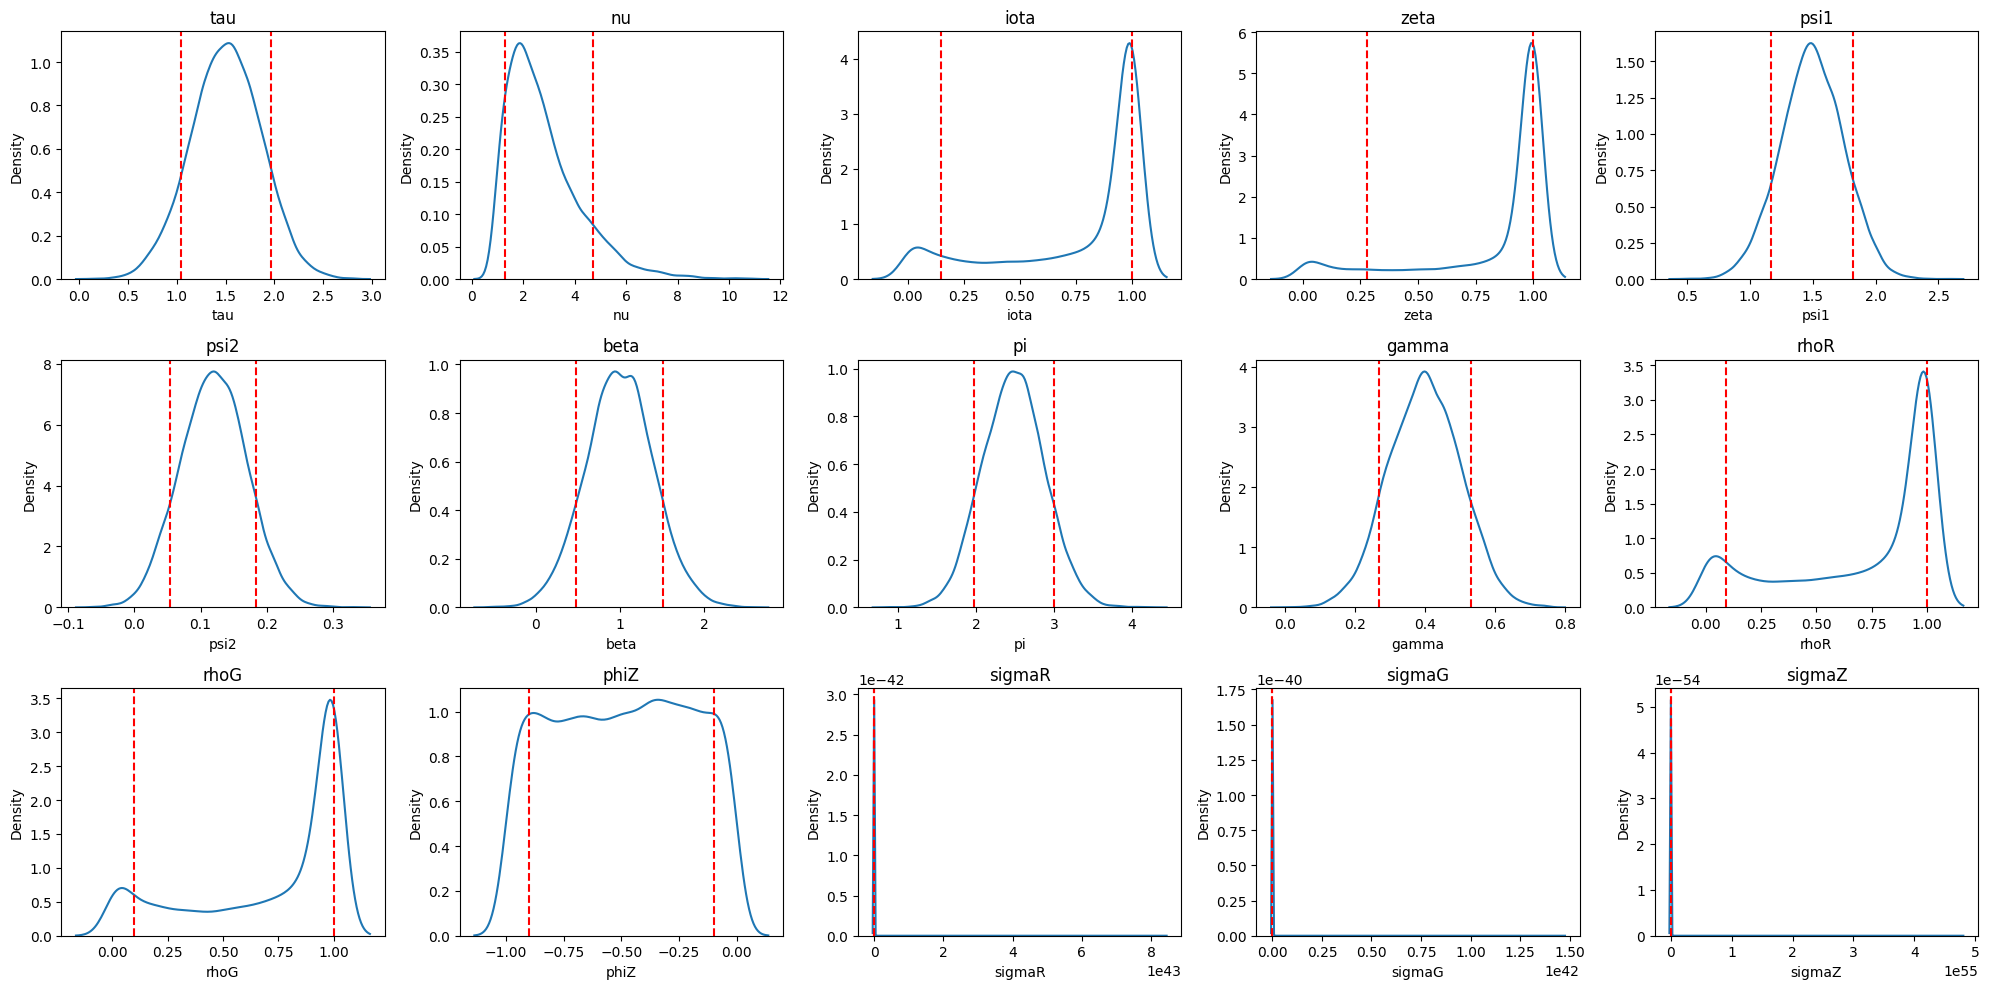

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 5, figsize=(20,10))

for i, col in enumerate(df.columns):

    ax = axes.flat[i]
    sns.kdeplot(df[col], ax=ax)
    q10 = df[col].quantile(0.1)

    q90 = df[col].quantile(0.9)
    # print(q90, col)
    ax.axvline(q10, color='r', linestyle='--')
    ax.axvline(q90, color='r', linestyle='--')

    ax.set_title(col)

fig.tight_layout()
plt.show()

# 01

In [ ]:
import numpy as np
from keras import Input, Model
from keras.src.layers import Conv1D, LSTM, Dense, MaxPooling1D, Bidirectional, \
    BatchNormalization, Dropout, Flatten
from keras.src.optimizers import Nadam
from sklearn.model_selection import train_test_split, KFold
import tensorflow as tf

np.random.seed(0)
X_train = y_smp
y_train = pars_smp

# X_test = np.load('y_smp_test.npy')
y_train = np.squeeze(y_train)
# n_samples = 10
# n_time_steps = 200
# n_features = 3
# n_parameters = 15
#
# X_train = np.random.randn(n_samples, n_time_steps, n_features)
# y_train = np.random.randn(n_samples, n_parameters)
# X_test = np.random.randn(5, n_time_steps, n_features)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.5, random_state=42)


# Создаем функцию потерь RMSE Loss
def rmse_loss(y_true, y_pred):
    # Рассчитываем среднеквадратичную ошибку для каждого параметра
    square_errors = tf.square(y_true - y_pred)
    # Вычисляем взвешенную сумму квадратных ошибок
    weighted_rmse = tf.reduce_sum(square_errors, axis=-1)  # Предполагается, что у вас есть несколько параметров
    # Нормируем метрику для получения Lмеан
    rmse_normalized = tf.exp(-tf.sqrt(weighted_rmse))
    return rmse_normalized


# Функция потерь для 10-го квантиля
def quantile_loss_10(y_true, y_pred):
    tau = 0.10  # Значение квантиля
    error = y_true - y_pred
    loss = tf.reduce_mean(tf.maximum(tau * error, (tau - 1) * error), axis=-1)
    return loss


# Функция потерь для 25-го квантиля
def quantile_loss_25(y_true, y_pred):
    tau = 0.25  # Значение квантиля
    error = y_true - y_pred
    loss = tf.reduce_mean(tf.maximum(tau * error, (tau - 1) * error), axis=-1)
    return loss


# Функция потерь для 50-го квантиля
def quantile_loss_50(y_true, y_pred):
    tau = 0.50  # Значение квантиля
    error = y_true - y_pred
    loss = tf.reduce_mean(tf.maximum(tau * error, (tau - 1) * error), axis=-1)
    return loss


# Функция потерь для 75-го квантиля
def quantile_loss_75(y_true, y_pred):
    tau = 0.75  # Значение квантиля
    error = y_true - y_pred
    loss = tf.reduce_mean(tf.maximum(tau * error, (tau - 1) * error), axis=-1)
    return loss


# Функция потерь для 90-го квантиля
def quantile_loss_90(y_true, y_pred):
    tau = 0.90  # Значение квантиля
    error = y_true - y_pred
    loss = tf.reduce_mean(tf.maximum(tau * error, (tau - 1) * error), axis=-1)
    return loss


def build_model(n_time_steps=200, n_features=3):
    inputs = Input(shape=(n_time_steps, n_features))
    x = Conv1D(filters=32, kernel_size=3, activation='relu')(inputs)
    x = MaxPooling1D()(x)
    x = Conv1D(filters=64, kernel_size=4, activation='relu')(x)
    x = MaxPooling1D()(x)
    x = Bidirectional(LSTM(units=32, return_sequences=True))(x)
    x = BatchNormalization()(x)
    x = Bidirectional(LSTM(units=64))(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)

    mean = Dense(15, activation='linear', name='mean')(x)
    q10 = Dense(15, activation='linear', name='q10')(x)
    q25 = Dense(15, activation='linear', name='q25')(x)
    q50 = Dense(15, activation='linear', name='q50')(x)
    q75 = Dense(15, activation='linear', name='q75')(x)
    q90 = Dense(15, activation='linear', name='q90')(x)
    outputs = [mean, q10, q25, q50, q75, q90]
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(loss={
        'mean': rmse_loss,
        'q10': quantile_loss_10,
        'q25': quantile_loss_25,
        'q50': quantile_loss_50,
        'q75': quantile_loss_75,
        'q90': quantile_loss_90,
    }, optimizer=Nadam(),
        metrics={
            'mean': 'accuracy',
            'q10': 'accuracy',
            'q25': 'accuracy',
            'q50': 'accuracy',
            'q75': 'accuracy',
            'q90': 'accuracy',
        })
    print(model.summary())
    return model


# Определите количество разбиений для кросс-валидации
n_splits = 3
kf = KFold(n_splits=n_splits)

mean_rmse_scores = []
quantile_rmse_scores = {'q10': [], 'q25': [], 'q50': [], 'q75': [], 'q90': []}

model = build_model()

# Разделите данные и обучите/оцените модель для каждого разбиения
for train_index, test_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[test_index]
    model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=64, validation_data=(X_val_fold, y_val_fold), verbose=0)

    rmse_scores = model.evaluate(X_val_fold, y_val_fold, batch_size=64)

    mean_rmse_scores.append(rmse_scores[1])  # среднее RMSE
    quantile_rmse_scores['q10'].append(rmse_scores[2])  # RMSE для квантили 10
    quantile_rmse_scores['q25'].append(rmse_scores[3])  # RMSE для квантили 25
    quantile_rmse_scores['q50'].append(rmse_scores[4])  # RMSE для квантили 50
    quantile_rmse_scores['q75'].append(rmse_scores[5])  # RMSE для квантили 75
    quantile_rmse_scores['q90'].append(rmse_scores[6])  # RMSE для квантили 90




Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 200, 3)]             0         []                            
                                                                                                  
 conv1d (Conv1D)             (None, 198, 32)              320       ['input_1[0][0]']             
                                                                                                  
 max_pooling1d (MaxPooling1  (None, 99, 32)               0         ['conv1d[0][0]']              
 D)                                                                                               
                                                                                                  
 conv1d_1 (Conv1D)           (None, 96, 64)               8256      ['max_pooling1d[0][0]']   

In [ ]:
mean, q10, q25, q50, q75, q90 = model.predict(X_test)
predictions = np.stack([mean, q10, q25, q50, q75, q90], axis=-1)
print(f'shape:{predictions.shape}')

# Выведите средние значения метрик RMSE для всех разбиений
print("Mean RMSE (Mean):", np.mean(mean_rmse_scores))
print("Mean RMSE (Q10):", np.mean(quantile_rmse_scores['q10']))
print("Mean RMSE (Q25):", np.mean(quantile_rmse_scores['q25']))
print("Mean RMSE (Q50):", np.mean(quantile_rmse_scores['q50']))
print("Mean RMSE (Q75):", np.mean(quantile_rmse_scores['q75']))
print("Mean RMSE (Q90):", np.mean(quantile_rmse_scores['q90']))
np.save('sample_submit.npy', predictions)

ValueError: ignored

In [ ]:
X_test

array([[[1.14394045],
        [2.24163444],
        [0.35423892],
        ...,
        [0.07398103],
        [0.06935505],
        [0.06437022]],

       [[1.71948618],
        [2.22175542],
        [0.54032873],
        ...,
        [0.12934819],
        [0.07269949],
        [0.06629753]],

       [[1.30464178],
        [2.24047448],
        [0.28916051],
        ...,
        [0.08163178],
        [0.06259117],
        [0.09105789]],

       ...,

       [[1.43979534],
        [1.79748702],
        [0.58762325],
        ...,
        [0.05170724],
        [0.08918457],
        [0.06767694]],

       [[1.83170734],
        [2.48775253],
        [0.51310881],
        ...,
        [0.07332914],
        [0.07888286],
        [0.06951718]],

       [[1.10611612],
        [1.46170297],
        [0.74029472],
        ...,
        [0.06190248],
        [0.06990973],
        [0.05887572]]])